In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("data/imdb_movies.csv")
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [2]:
# Extracting the primary genre of the movie
df['primary_genre'] = df['genre'].str.split(',').str[0].str.strip()

# Extracting the year and the month when the movie was released
df["Release_year"] = pd.to_datetime(df["date_x"].values).year
df["Release_month"] = pd.to_datetime(df["date_x"].values).month

In [3]:
print("Shape: ", df.shape)
print("Columns: ", df.columns)

Shape:  (10178, 15)
Columns:  Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country',
       'primary_genre', 'Release_year', 'Release_month'],
      dtype='object')


Dataset information and visualization (Exploratory data analysis)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   names          10178 non-null  object 
 1   date_x         10178 non-null  object 
 2   score          10178 non-null  float64
 3   genre          10093 non-null  object 
 4   overview       10178 non-null  object 
 5   crew           10122 non-null  object 
 6   orig_title     10178 non-null  object 
 7   status         10178 non-null  object 
 8   orig_lang      10178 non-null  object 
 9   budget_x       10178 non-null  float64
 10  revenue        10178 non-null  float64
 11  country        10178 non-null  object 
 12  primary_genre  10093 non-null  object 
 13  Release_year   10178 non-null  int32  
 14  Release_month  10178 non-null  int32  
dtypes: float64(3), int32(2), object(10)
memory usage: 1.1+ MB


In [5]:
df.describe()

,score,budget_x,revenue,Release_year,Release_month
count,10178.000000,1.017800e+04,1.017800e+04,10178.000000,10178.000000
mean,63.497052,6.488238e+07,2.531401e+08,2007.945667,6.652289
std,13.537012,5.707565e+07,2.777880e+08,15.317071,3.525124
min,0.000000,1.000000e+00,0.000000e+00,1903.000000,1.000000
25%,59.000000,1.500000e+07,2.858898e+07,2001.000000,3.000000
50%,65.000000,5.000000e+07,1.529349e+08,2013.000000,7.000000
75%,71.000000,1.050000e+08,4.178021e+08,2019.000000,10.000000
max,100.000000,4.600000e+08,2.923706e+09,2023.000000,12.000000


In [6]:
pd.DataFrame(df.nunique())

,0
names,9660
date_x,5688
score,79
genre,2303
overview,9905
crew,9927
orig_title,9736
status,3
orig_lang,54
budget_x,2316


Plot  between year (interval) and number of movies

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_1716\2589283137.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df["Release_year"], bins=40))["names"].agg("count").plot(kind="bar",color="black")


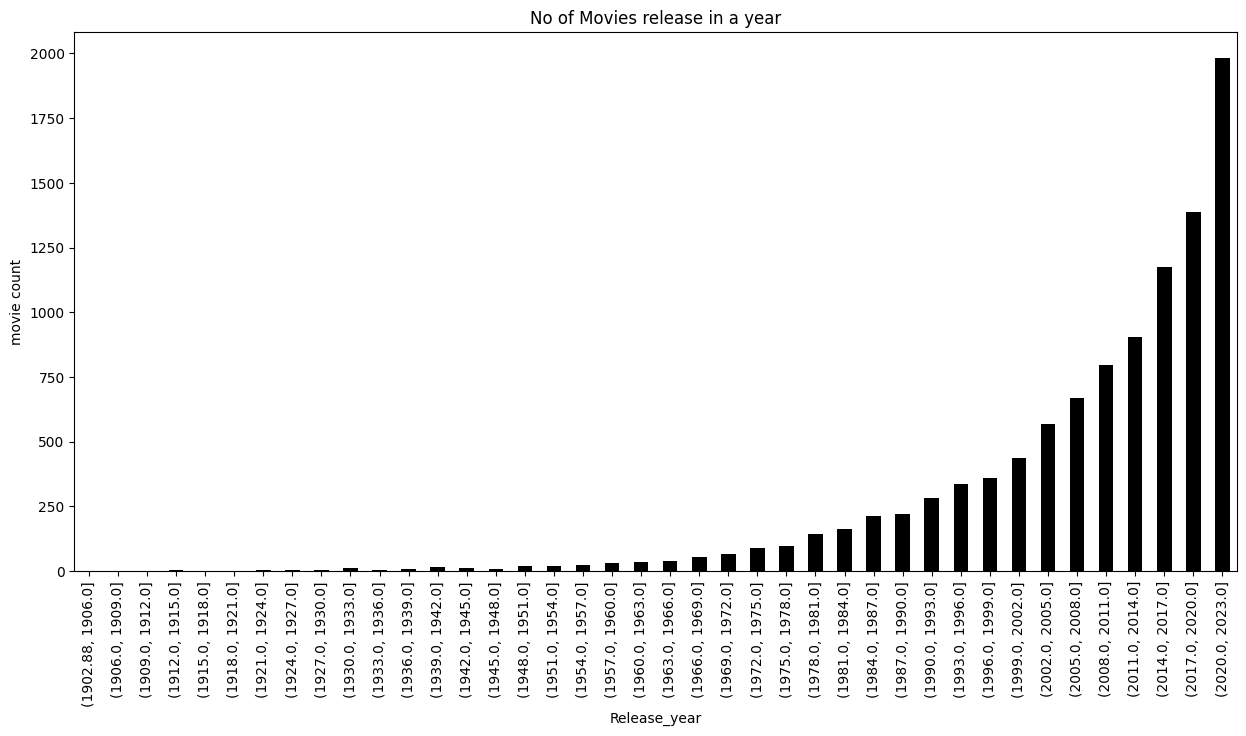

In [7]:
plt.figure(figsize=(15,7))

df.groupby(pd.cut(df["Release_year"], bins=40))["names"].agg("count").plot(kind="bar",color="black")

plt.title("No of Movies release in a year")
plt.ylabel("movie count")
plt.show()

Plot between month and number of movies

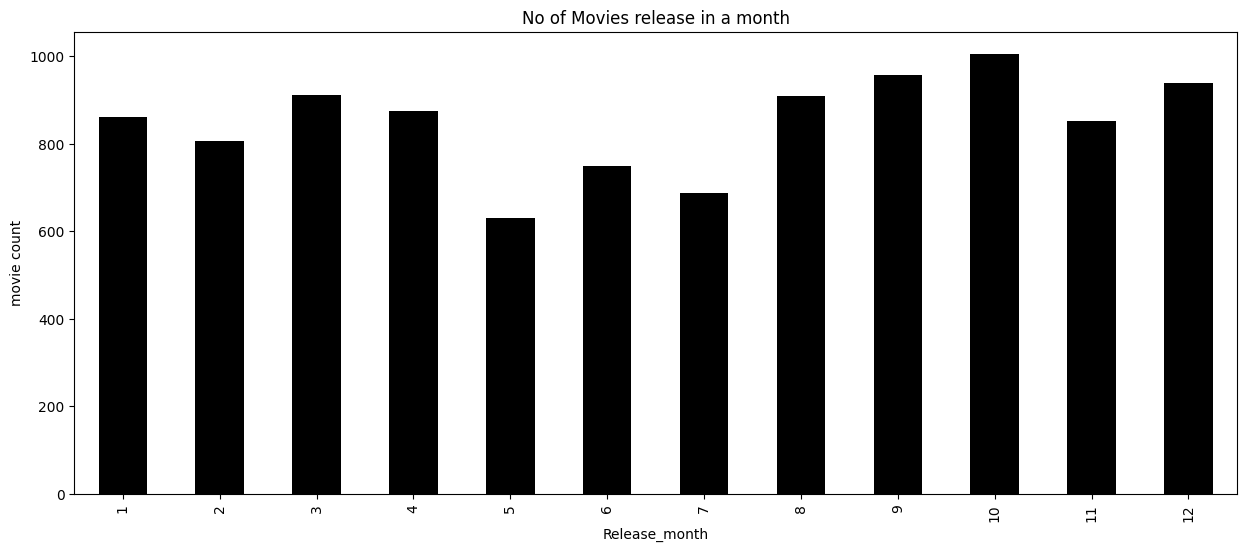

In [8]:
plt.figure(figsize=(15,6))

df.groupby("Release_month")["names"].agg("count").plot(kind="bar",color="black")

plt.title("No of Movies release in a month")
plt.ylabel("movie count")
plt.show()

The number of movies depending on the score 

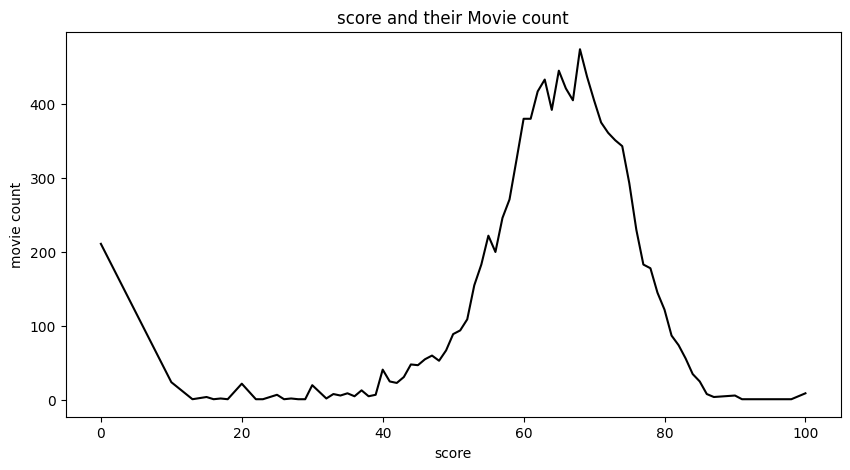

In [9]:
plt.figure(figsize=(10,5))

df.groupby("score")["names"].agg("count").plot(kind="line", color="black")

plt.title("score and their Movie count")
plt.ylabel("movie count")
plt.show()

Revenue depending on the score of the movie

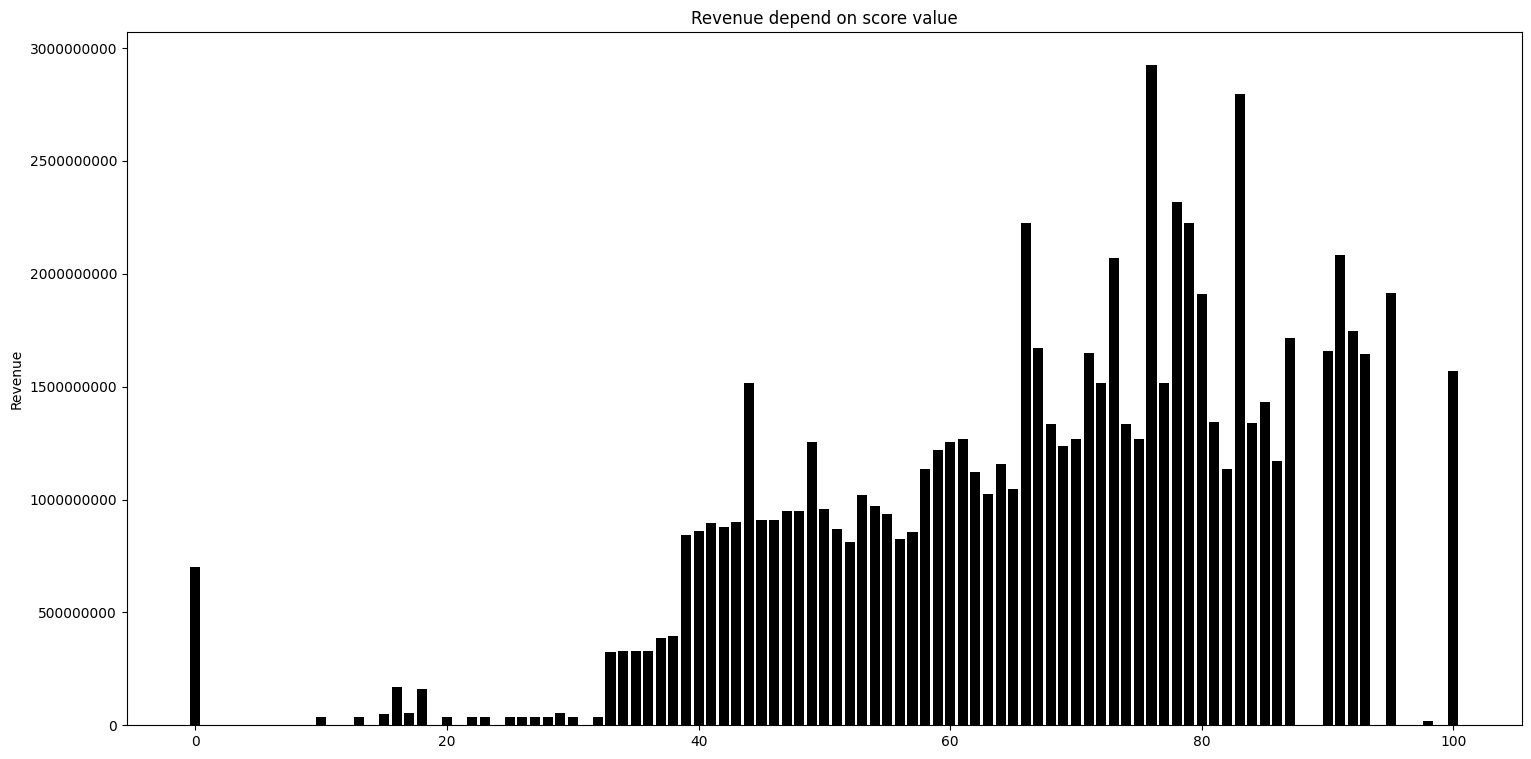

In [10]:
plt.figure(figsize=(18,9))

plt.bar(df["score"], df["revenue"], color="black")

plt.ticklabel_format(axis='y', style='plain')
plt.title("Revenue depend on score value")
plt.ylabel("Revenue")
plt.show()

Determining Feature and Target columns of the dataset

In [11]:
X = df.drop(["names", "date_x", "genre", "overview", "crew", "orig_title", "status", "orig_lang", "revenue"], axis=1)
y = df["revenue"]
print("X: ", X.shape)

X:  (10178, 6)


In [12]:
X.head()

,score,budget_x,country,primary_genre,Release_year,Release_month
0,73.0,75000000.0,AU,Drama,2023,3
1,78.0,460000000.0,AU,Science Fiction,2022,12
2,76.0,100000000.0,AU,Animation,2023,4
3,70.0,12300000.0,AU,Animation,2023,1
4,61.0,77000000.0,US,Action,2023,3


Defining numerical & categorical types for Feature columns

In [13]:
num_cols = X.select_dtypes(include=["number"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

print("numerical columns: ", num_cols)
print("categorical columns: ", cat_cols)

numerical columns:  Index(['score', 'budget_x', 'Release_year', 'Release_month'], dtype='object')
categorical columns:  Index(['country', 'primary_genre'], dtype='object')


Cleaning the both numerical and categorical data

In [14]:
# Applying standardization to scale our numerical values
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Vectorizing our categorical data via OneHotEncoder
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

Creating a ColumnTransformer to apply our pipelines on adequate columns

In [15]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['score', 'budget_x', 'Release_year', 'Release_month'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['country', 'primary_genre'], dtype='object'))])

Splitting training and testing data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Training & Evaluating functions 

In [17]:
def pipeline(model_func, preprocessor):
    
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model_func())
    ])
    
    return pipeline

def evaluate_regression(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    return {
        "MAE": mae,
        "MSE": mse,
        "R-squared": r2
    }

def training_prediction(X_train, y_train, X_test, y_test, model):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    evaluation = evaluate_regression(y_test, y_pred)
    
    return {
        "prediction": y_pred,
        "evaluation": evaluation,
    }


Performing KFold cross-validation to determine the best models

In [18]:
linear_reg_pipe = pipeline(LinearRegression, preprocessor)

svr_pipe = pipeline(SVR, preprocessor)

dt_pipe = pipeline(DecisionTreeRegressor, preprocessor)

rf_pipe = pipeline(RandomForestRegressor, preprocessor)

# Perform k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

models = [linear_reg_pipe, svr_pipe, dt_pipe, rf_pipe]
model_names = ['Linear Regression', 'SVR', 'Decision Tree Regressor', 'Random Forest Regressor']

for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    print(f"{name}: Mean r2: {scores.mean()}, Std r2: {scores.std()}")


Linear Regression: Mean r2: 0.5427721530508178, Std r2: 0.015789724225204433
SVR: Mean r2: -0.13355489209752683, Std r2: 0.029210988681063175
Decision Tree Regressor: Mean r2: 0.4198040229618698, Std r2: 0.028652137929078832
Random Forest Regressor: Mean r2: 0.6891995315231132, Std r2: 0.008836433786113278


As we can see Random Forest Regressor is the best model

We'll try to fine tune parameters for svr & rfr to see if we can get a better model using GridSearch cross-validation

In [21]:
param_grid_dtr = {
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2']
}

grid_search_dtr = GridSearchCV(dt_pipe, param_grid_dtr, cv=5)
grid_search_dtr.fit(X_train, y_train)

# Best parameter found
best_dtr_params = grid_search_dtr.best_params_
print("Best Hyperparameters:", best_dtr_params)

best_dtr = grid_search_dtr.best_estimator_
print("best estimator: ", best_dtr)

Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['score', 'budget_x', 'Release_year', 'Release_month'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-

In [24]:
param_grid_rf = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf_pipe, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Best parameter found
best_rf_params = grid_search_rf.best_params_
print("Best Hyperparameters:", best_rf_params)

best_rf = grid_search_rf.best_estimator_
print("best estimator: ", best_rf)

Best Hyperparameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
best estimator:  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['score', 'budget_x', 'Release_year', 'Release_month'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                 

Evaluating our models with Regression metrics

In [25]:
print("Evaluation scores:")

predictions_evaluations = {}

predictions_evaluations["LR"] = training_prediction(X_train, y_train, X_test, y_test, linear_reg_pipe)
print("LR: ", predictions_evaluations["LR"]["evaluation"])

predictions_evaluations["DTR"] = training_prediction(X_train, y_train, X_test, y_test, best_dtr)
print("DTR: ", predictions_evaluations["DTR"]["evaluation"])

predictions_evaluations["RFR"] = training_prediction(X_train, y_train, X_test, y_test, best_rf)
print("RFR: ", predictions_evaluations["RFR"]["evaluation"])

Evaluation scores:
LR:  {'MAE': 136120103.44064838, 'MSE': 3.89250895883599e+16, 'R-squared': 0.5423941670354484}
DTR:  {'MAE': 143425980.7342563, 'MSE': 4.678429791896678e+16, 'R-squared': 0.45000081322169705}
RFR:  {'MAE': 98297897.57881503, 'MSE': 2.472536185835233e+16, 'R-squared': 0.7093270708380146}


Plotting the accuracy of each model

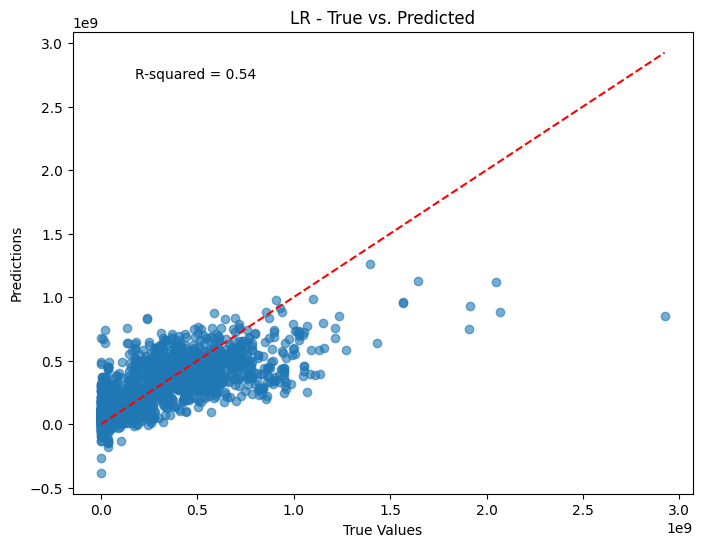

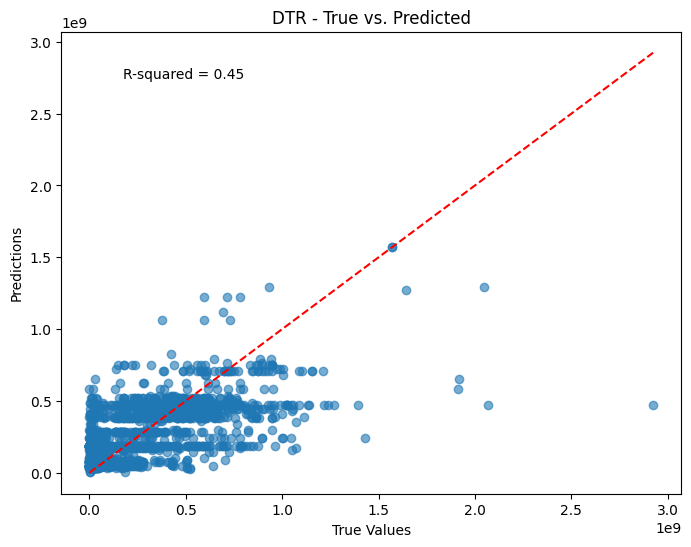

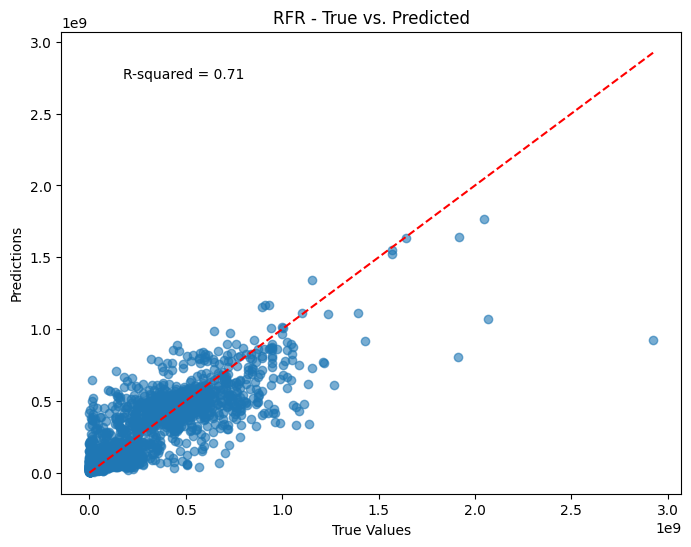

In [26]:
for name, preds in predictions_evaluations.items():
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, preds["prediction"], alpha=0.6)

    # Plotting the perfect prediction line
    max_val = max(np.max(y_test), np.max(preds["prediction"]))
    plt.plot([0, max_val], [0, max_val], color='red', linestyle='--')

    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name} - True vs. Predicted')

    # Adding R-squared value to the plot
    r2 = r2_score(y_test, preds["prediction"])
    plt.text(0.1, 0.9, f'R-squared = {r2:.2f}', transform=plt.gca().transAxes)

    plt.show()

The best model is obviously RFR 

Let's try an example sample of a movie to see the results of it's box office revenue

In [32]:
sample_to_predict = pd.DataFrame([[61.0, 77000000.0	, "US", "Action", 2023, 3]],
                                  columns=["score",	"budget_x",	"country",	"primary_genre", "Release_year", "Release_month"])

pred_lr = linear_reg_pipe.predict(sample_to_predict)
pred_dtr = best_dtr.predict(sample_to_predict)
pred_rfr = best_rf.predict(sample_to_predict)

print("Prediction for Linear Regression:", pred_lr)
print("Prediction for Decision Tree Regressor:", pred_dtr)
print("Prediction for Random Forest Regressor:", pred_rfr)


Prediction for Linear Regression: [2.75933767e+08]
Prediction for Decision Tree Regressor: [4.45828062e+08]
Prediction for Random Forest Regressor: [4.44524763e+08]
